In [1]:
from financials_loader import FinancialsLoader
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

msft_fl = FinancialsLoader(["MSFT"])

msft_cashflow = msft_fl.load_balance_sheet()[0]

msft_cashflow.T

MSFT
/home/michael/Share/project/Finance-App/data/MSFT Balance Sheet.csv


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Fiscal year ends in June. USD in millions except per share data.,Assets,Current assets,Cash,Cash and cash equivalents,Short-term investments,Total cash,Receivables,Inventories,Deferred income taxes,Other current assets,...,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total liabilities,Stockholders' equity,Common stock,Retained earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
2010-06,NaN,NaN,NaN,5505,31283,36788,13014,740,2184,2950,...,1178,7445,13791,39938,NaN,62856,-16681,NaN,46175,86113
2011-06,NaN,NaN,NaN,9610,43162,52772,14987,1372,2467,3320,...,1398,8072,22847,51621,NaN,63415,-8195,1863,57083,108704
2012-06,NaN,NaN,NaN,6938,56102,63040,15780,1137,2035,3092,...,1406,8208,22220,54908,NaN,65797,566,NaN,66363,121271
2013-06,NaN,NaN,NaN,3804,73218,77022,17486,1938,1632,3388,...,1760,10000,26070,63487,NaN,67306,9895,1743,78944,142431
2014-06,NaN,NaN,NaN,8669,77040,85709,19544,2660,1941,4392,...,2008,11594,36975,82600,NaN,68366,17710,3708,89784,172384
2015-06,NaN,NaN,NaN,5595,90931,96526,17908,2902,1915,5461,...,2095,13544,46282,96140,NaN,68465,9096,2522,80083,176223
2016-06,NaN,NaN,NaN,6510,106730,113240,18277,2251,NaN,5892,...,6441,13640,62340,121697,NaN,68178,2282,1537,71997,193694
2017-06,NaN,NaN,NaN,7663,125318,132981,19792,2181,NaN,4897,...,10377,17184,104165,168692,NaN,69315,2648,431,72394,241086
2018-06,NaN,NaN,NaN,11946,121822,133768,26481,2662,NaN,6751,...,3815,35476,117642,176130,NaN,71223,13682,-2187,82718,258848


In [2]:
msft_cashflow = msft_cashflow.set_index('Fiscal year ends in June. USD in millions except per share data.').T
msft_cashflow.index.rename('Timestamp', inplace=True)
msft_cashflow.index = pd.to_datetime(msft_cashflow.index, format='%Y-%M')
msft_cashflow

Fiscal year ends in June. USD in millions except per share data.,Assets,Current assets,Cash,Cash and cash equivalents,Short-term investments,Total cash,Receivables,Inventories,Deferred income taxes,Other current assets,...,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total liabilities,Stockholders' equity,Common stock,Retained earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:06:00,NaN,NaN,NaN,5505.0,31283.0,36788.0,13014.0,740.0,2184.0,2950.0,...,1178.0,7445.0,13791.0,39938.0,NaN,62856.0,-16681.0,NaN,46175.0,86113.0
2011-01-01 00:06:00,NaN,NaN,NaN,9610.0,43162.0,52772.0,14987.0,1372.0,2467.0,3320.0,...,1398.0,8072.0,22847.0,51621.0,NaN,63415.0,-8195.0,1863.0,57083.0,108704.0
2012-01-01 00:06:00,NaN,NaN,NaN,6938.0,56102.0,63040.0,15780.0,1137.0,2035.0,3092.0,...,1406.0,8208.0,22220.0,54908.0,NaN,65797.0,566.0,NaN,66363.0,121271.0
2013-01-01 00:06:00,NaN,NaN,NaN,3804.0,73218.0,77022.0,17486.0,1938.0,1632.0,3388.0,...,1760.0,10000.0,26070.0,63487.0,NaN,67306.0,9895.0,1743.0,78944.0,142431.0
2014-01-01 00:06:00,NaN,NaN,NaN,8669.0,77040.0,85709.0,19544.0,2660.0,1941.0,4392.0,...,2008.0,11594.0,36975.0,82600.0,NaN,68366.0,17710.0,3708.0,89784.0,172384.0
2015-01-01 00:06:00,NaN,NaN,NaN,5595.0,90931.0,96526.0,17908.0,2902.0,1915.0,5461.0,...,2095.0,13544.0,46282.0,96140.0,NaN,68465.0,9096.0,2522.0,80083.0,176223.0
2016-01-01 00:06:00,NaN,NaN,NaN,6510.0,106730.0,113240.0,18277.0,2251.0,NaN,5892.0,...,6441.0,13640.0,62340.0,121697.0,NaN,68178.0,2282.0,1537.0,71997.0,193694.0
2017-01-01 00:06:00,NaN,NaN,NaN,7663.0,125318.0,132981.0,19792.0,2181.0,NaN,4897.0,...,10377.0,17184.0,104165.0,168692.0,NaN,69315.0,2648.0,431.0,72394.0,241086.0
2018-01-01 00:06:00,NaN,NaN,NaN,11946.0,121822.0,133768.0,26481.0,2662.0,NaN,6751.0,...,3815.0,35476.0,117642.0,176130.0,NaN,71223.0,13682.0,-2187.0,82718.0,258848.0


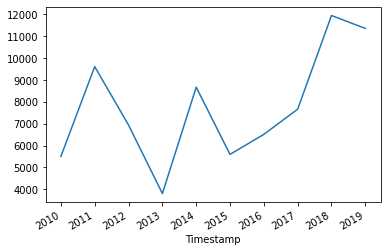

In [3]:
msft_cashflow['Cash and cash equivalents'].plot()

In [81]:
import yfinance as yf
from pandas import DataFrame as df
from pandas_datareader import data as pdr

msft = yf.Ticker("MSFT")

msft_ohlc_df = msft.history(period="max", interval='1wk', start='2010-01-01', end='2019-01-01')
msft_ohlc_df.index = pd.to_datetime(msft_ohlc_df.index, format='%Y-%M-%d')
msft_ohlc_df['Open']

Date
2010-01-01     23.97
2010-01-08     23.70
2010-01-15     24.33
2010-01-22     23.48
2010-01-29     23.40
               ...  
2018-11-30    108.49
2018-12-07    106.21
2018-12-14    106.09
2018-12-21     99.60
2018-12-28    100.05
Name: Open, Length: 506, dtype: float64

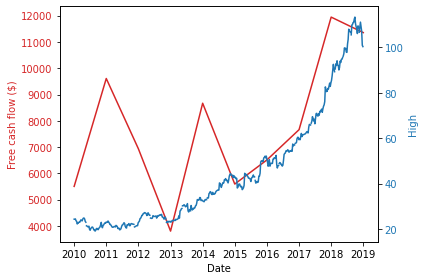

In [82]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Free cash flow ($)', color=color)
ax1.plot(msft_cashflow.index, msft_cashflow['Cash and cash equivalents'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('High', color=color)  # we already handled the x-label with ax1
ax2.plot(msft_ohlc_df.index, msft_ohlc_df['High'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [86]:
import plotly.graph_objects as go

df = msft_ohlc_df
fig = go.Figure(data=go.Ohlc(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
fig